# Working with Datacommons

Datacommons is intended for various data science tasks. This tutorial introduces the datacommons knowledge graph and discusses two tools to help integrate its data into your data science projects: (1) the [datacommons browser](https://datcom-browser.appspot.com/node/entity) and (2) the Python [Query API](https://github.com/google/datacommons). Before getting started, you will need to install the Python API package.   


In [0]:
# Install datacommons
!pip install --upgrade -q git+https://github.com/google/datacommons.git

## What is Datacommons?

DataCommons is an open knowledge graph of structured data. It contains statements about real world objects such as

* [Santa Clara County](https://browser.datacommons.org/node/entity?itemtype=County&dcid=dc/zxvc6e2) is contained in the [State of California](https://browser.datacommons.org/node/entity?itemtype=State&dcid=dc/b72vdv)
* The latitude of [Berkeley, CA](https://browser.datacommons.org/node/entity?itemtype=City&dcid=dc/re83dx3) is 37.8703
* The [population of all persons in Maryland ](https://browser.datacommons.org/node/entity?itemtype=Population&dcid=dc/p/pd4hzgkh64lm5)has a total count of 5,959,902.

In the graph, [*entities*](https://en.wikipedia.org/wiki/Entity) like [Santa Clara County](https://browser.datacommons.org/node/entity?itemtype=County&dcid=dc/zxvc6e2) are represented by nodes. Every node has a type corresponding to what the node represents. For example, [California](https://browser.datacommons.org/node/entity?itemtype=State&dcid=dc/b72vdv) is a [State](https://schema.org/State). *Relations* between entities are represented by edges between these nodes. For example, the statement "Santa Clara County is contained in the State of California" is represented in the graph as two nodes: "Santa Clara County" and "California" with an edge labeled "[containedInPlace](https://schema.org/containedInPlace)" pointing from Santa Clara to California.

Datacommons closely follows the [Schema.org data model](https://schema.org/docs/datamodel.html) and leverages schema.org schema to provide a common set of types and properties.

## DataCommons Browser

The [dataCommons browser](https://browser.datacommons.org/) provides a way to explore the data in a human-readable format. It is the best way to explore what is in dataCommons. Searching in the browser for an entity like [Mountain View](https://browser.datacommons.org/node/entity?itemtype=City&dcid=dc/m1rl3k), takes you to a page about the entity, including properties like [containedInPlace](http://schema.org/containedInPlace) and [timezone](http://datacommons.org/timezone).

An important property for all entities is the **`dcid`**. The `dcid` (DataCommons identifier) is a unique identifier assigned to each entity in the knowledge graph. With this identifier, you will be able to search for and query information on the given entity in ways that we will discuss later. The `dcid` is listed at the top of the page next to "About: " and also in the list of properties. 

## Python API

The Python [Query API](https://github.com/google/datacommons) provides functions for users to extract structured information from Datacommons programmatically as [Pandas](https://pandas.pydata.org/) Dataframes. Dataframes allow access to all the data processing, analytical and visualization tools provided by packages such as Pandas, NumPy, SciPy, and Matplotlib.

Every notebook begins by loading the dataCommons client as follows:


In [0]:
# Import all required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import datacommons

# Create the DataCommons client
dc = datacommons.Client()

# A helper function that will display the head of each table
def print_head(label, table, rows=5):
    print(label)
    print(table.head(rows))
    

/usr/local/lib/python2.7/dist-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access datacommons_66054275879-a0nalqfe2p9shlv4jpra5jekfkfnr8ug.apps.googleusercontent.com.dat: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/v2/auth?redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=66054275879-a0nalqfe2p9shlv4jpra5jekfkfnr8ug.apps.googleusercontent.com&oauth_displayname=DataCommons+Python+Client&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&access_type=offline

Enter verification code: 4/jQCEf1YUHc0djMy2D09X2fi55tJCtX3CdZRIG6Jsx09p26mmPqgJPoc
Authentication successful.


## Example: Median Age vs Population by State
For this exercise, we compare the population and median ages for US states, counties, and cities. First, let's lookup the dcid for the [United States](https://browser.datacommons.org/node/entity?itemtype=Country&dcid=dc/2sffw13)'. 

Note that "Country" defines the datacommons itemtype, and "country" is the name we assign to this column. 


### Using `get_places_in` to Query Administrative Areas

The Python API defines a number of convenience functions for building Pandas dataframes with information in the datacommons graph. We will be using  which requires three arguments:

- `place_type` or the itemtype of the administrative area that we wish to query for 
- `container_dcid` the dcid of the administrative area that will contain entities of type `place_type`
- `col_name` the name of the new column added.



Next, we add a column (and rows) corresponding to different states  with the **`get_places_in`** function. In the datacommons knowledge graph, the 'containedInPlace' property relates a administrative area types to its containing administrative area type. Concretely, every 'state' node has a directed edge to a 'country' node where the name of this edge is 'containedInPlace'. To confirm this, you can check the browser page for '[United States](https://browser.datacommons.org/node/entity?itemtype=Country&dcid=dc/2sffw13)'. The same also goes for 'county' to 'state' nodes and 'city' to 'county'.

The following **`get_places_in`** function call returns a Pandas dataframe containing a single column named `col_name` populated with dcids of entities with itemtype `place_type` contained in `container_dcid`.

In [0]:
# Create a dataframe with the dcids of states, counties, and cities in the
# United States.
US_DCID = 'dc/2sffw13'

# Some constants for tweaking the query speeds in this notebook
MAX_STATE_ROWS = 100
MAX_COUNTY_ROWS = 3500
MAX_CITY_ROWS = 4000

states = dc.get_places_in(place_type='State',
                          container_dcid=US_DCID,  # United States
                          col_name='state')
print("Created table STATES with {} rows".format(states.shape[0]))

counties = dc.get_places_in(place_type='County',
                            container_dcid=US_DCID,
                            col_name='county',
                            max_rows=MAX_COUNTY_ROWS)
print("Created table COUNTIES with {} rows".format(counties.shape[0]))

cities = dc.get_places_in(place_type='City',
                          container_dcid=US_DCID,
                          col_name='city',
                          max_rows=MAX_CITY_ROWS)
print("Created table CITIES with {} rows".format(cities.shape[0]))

Created table STATES with 56 rows
Created table COUNTIES with 3082 rows
Created table CITIES with 4001 rows


Unfortunately, dcids aren't very readable. Let's perform an **`expand`** to include a column with the name for each state. This function call adds a column with state dcids. Here 'name' specifies the property/edge of interest, 'state', 'county' and 'city' each specifies the source node for this relation, and 'name' is the name of our new columns. Because 'state', 'county' and 'city' are the destinations for the 'name' relation, we set 'outgoing = True' (the default behavior).

In [0]:
# Get the names associated with each entity
states = dc.expand(states, 'name', 'state', 'name')
print_head('STATES table', states)

counties = dc.expand(counties, 'name', 'county', 'name', outgoing=True, max_rows=MAX_COUNTY_ROWS)
print_head('\nCOUNTIES table', counties)

cities = dc.expand(cities, 'name', 'city', 'name', outgoing=True, max_rows=MAX_CITY_ROWS)
print_head('\nCITIES table', cities)

STATES table
        state      name
0       State      Text
1  dc/11lqrr2  Missouri
2  dc/1c9wee1  Arkansas
3   dc/1hbcpn   Arizona
4   dc/23mkg1      Ohio

COUNTIES table
       county            name
0      County            Text
1  dc/0v5hbh1     Cass County
2  dc/14ephx1     Clay County
3   dc/1y835g    Clark County
4  dc/2gdh7l1  Madison County

CITIES table
         city            name
0        City            Text
1  dc/015pt52   Harrisonville
2  dc/6wh3vk1   Pleasant Hill
3  dc/6whr0g1  Lake Winnebago
4   dc/7f6z93          Drexel


Great! Now we can begin to fill our dataframe with the population and median age for each state. To do that, we'll need to understand a little bit about queryng statistical data.

### Querying Statistical Observations

Datacommons has a large corpus of statistical data, which can be queried and joined with other statistics. For example, we can query the  median income of women living in Berkeley, California or the number of individuals who are insured in Maryland. 

Before we explore how to do this, we need to understand how datacommons stores statistical data. In particular, there are two types of entities: [StatisticalPopulations](http://schema.datacommons.org/StatisticalPopulation) and [Observations](http://schema.datacommons.org/Observation). 

A StatisticalPopulation defines a collection of things of a certain type. One example of a population is the set of all [Persons in Pittsburgh](https://browser.datacommons.org/node/entity?itemtype=Population&dcid=dc/p/qmhnzbl00305b). For a particular population, we can have different Observations. For example, we can have an observation corresponding to the [population of Pittsburgh between 2006-2010](https://browser.datacommons.org/node/entity?itemtype=Observation&dcid=dc/o/qlebffce0n386).

It's important to note several things: 

*   StatisticalPopulations can correspond to types other than 'Person'! For example, we can consider the population of [type 'CriminalActivities' in Pittsburgh](https://browser.datacommons.org/node/entity?itemtype=Population&dcid=dc/p/q96p8fyyq8ncd). If we visit the page for [Pittsburgh](https://browser.datacommons.org/node/entity?itemtype=Place&dcid=dc/mqx41f1), we can see a list of the different associated populations.
*   We can define different constraints on our StatisticalPopulations. Maybe we're only interested in the [Pittsburgh population of naturalized US citizens](https://browser.datacommons.org/node/entity?itemtype=Population&dcid=dc/p/bcedd8bqg5w25).


The API defines functions allowing us to fetch data over these two types. To begin with, we can use the **`get_populations`** function get the population of type 'Person' for each state in our dataframe. Again, 'state' corresponds to associated node for the population, 'Person' refers to the type of population we want, and 'total_pop_dcid' is the name of our new column.


In [0]:
# Add a column with StatisticalPopulations with populationType 'Person'.
# This is done for each row in the 'state', 'county', 'city' columns we created
# in each data frame earlier. We call the new columns 'total_pop_dcid'.
states = dc.get_populations(states, 'state', 'total_pop_dcid', 'Person')
print_head('STATES table', states)

counties = dc.get_populations(counties, 'county', 'total_pop_dcid', 'Person', max_rows=MAX_COUNTY_ROWS)
print_head('\nCOUNTIES table', counties)

cities = dc.get_populations(cities, 'city', 'total_pop_dcid', 'Person', max_rows=MAX_CITY_ROWS)
print_head('\nCITIES table', cities)

STATES table
        state      name      total_pop_dcid
0       State      Text          Population
1  dc/11lqrr2  Missouri  dc/p/117mnmhkpytwd
2  dc/1c9wee1  Arkansas  dc/p/c6pts78tb90j3
3   dc/1hbcpn   Arizona  dc/p/bmr5jjx1glt91
4   dc/23mkg1      Ohio   dc/p/4hr6sscpb92g

COUNTIES table
       county            name      total_pop_dcid
0      County            Text          Population
1  dc/0v5hbh1     Cass County  dc/p/jym4rmm38x3sc
2  dc/14ephx1     Clay County  dc/p/f2dch3wz91201
3   dc/1y835g    Clark County  dc/p/9w8ybdqsedhwg
4  dc/2gdh7l1  Madison County  dc/p/2we3snn20vn69

CITIES table
         city            name      total_pop_dcid
0        City            Text          Population
1  dc/015pt52   Harrisonville  dc/p/5729cvr1kvbp8
2  dc/6wh3vk1   Pleasant Hill  dc/p/y3x1cmbf9vwqb
3  dc/6whr0g1  Lake Winnebago  dc/p/6mfrvv6n2m0ng
4   dc/7f6z93          Drexel  dc/p/c0eb552wd5er6


#### Retrieving Observations

Now that we have the StatisticalPopulation entities, let's get some observations! For this example, we're interested in the median age and total population count. One of the nice things about datacommons is that many statistical measures (e.g. median) have already been calculated and stored as properties in the graph. 

We use the **get_observations** function to get the the total count and the median age for each population referred to in our total_pop_dcid column. For our purposes, we filter the data to only include statistics from 2012-2016. As an example, you can compare the function calls below to the browser page for the [population of 'Person' in 'Ohio'](https://browser.datacommons.org/node/entity?itemtype=Population&dcid=dc/p/4hr6sscpb92g). If you scroll down to the bottom, you can find the Observation nodes for 'median_age' and 'count'

In [0]:
# Add a 'pop_count' and 'median_age' columns representing the total count and
# median age of populations in total_pop_dcid columns we created earlier.
states = dc.get_observations(states, 'total_pop_dcid', 'pop_count', '2012-01-01', '2016-01-01', 'count', 'count')
states = dc.get_observations(states, 'total_pop_dcid', 'median_age', '2012-01-01', '2016-01-01', 'age', 'median')
print_head('STATES table', states)

counties = dc.get_observations(counties, 'total_pop_dcid', 'pop_count', '2012-01-01', '2016-01-01', 'count', 'count', max_rows=MAX_COUNTY_ROWS)
counties = dc.get_observations(counties, 'total_pop_dcid', 'median_age', '2012-01-01', '2016-01-01', 'age', 'median', max_rows=MAX_COUNTY_ROWS)
print_head('\nCOUNTIES table', counties)

cities = dc.get_observations(cities, 'total_pop_dcid', 'pop_count', '2012-01-01', '2016-01-01', 'count', 'count', max_rows=MAX_CITY_ROWS)
cities = dc.get_observations(cities, 'total_pop_dcid', 'median_age', '2012-01-01', '2016-01-01', 'age', 'median', max_rows=MAX_CITY_ROWS)
print_head('\nCITIES table', cities)

STATES table
        state      name      total_pop_dcid    pop_count   median_age
0       State      Text          Population  Observation  Observation
1  dc/11lqrr2  Missouri  dc/p/117mnmhkpytwd      6059651         38.3
2  dc/1c9wee1  Arkansas  dc/p/c6pts78tb90j3      2968472         37.7
3   dc/1hbcpn   Arizona  dc/p/bmr5jjx1glt91      6728577         37.1
4   dc/23mkg1      Ohio   dc/p/4hr6sscpb92g     11586941         39.3

COUNTIES table
       county            name      total_pop_dcid    pop_count   median_age
0      County            Text          Population  Observation  Observation
1  dc/0v5hbh1     Cass County  dc/p/jym4rmm38x3sc       101324         39.4
2  dc/14ephx1     Clay County  dc/p/f2dch3wz91201       233135         36.8
3   dc/1y835g    Clark County  dc/p/9w8ybdqsedhwg         6860         43.7
4  dc/2gdh7l1  Madison County  dc/p/2we3snn20vn69        12403         42.9

CITIES table
         city            name      total_pop_dcid    pop_count   median_age
0    

### Cleaning and Plotting the Data
Great! It looks like we have all the data we need. Before we finish, let's do some post-processing.



In [0]:
def clean_data(table_name, pd_table):
    """ A helper function that cleans 'pd_table'. """
    cleaned_data = pd_table[1:][['name', 'pop_count', 'median_age']]
    cleaned_data[['pop_count', 'median_age']] = cleaned_data[['pop_count', 'median_age']].apply(pd.to_numeric, errors='coerce')
    cleaned_data = cleaned_data.dropna()
    
    # Print out table info
    print("Table {} now has {} rows".format(table_name, cleaned_data.shape[0]))
    print(cleaned_data.sort_values(by='pop_count', ascending=False).head(5))
    print("")
    
    # Return the cleaned frame
    return cleaned_data

# Clean the dataframes
states_clean = clean_data('STATES', states)
counties_clean = clean_data('COUNTIES', counties)
cities_clean = clean_data('CITIES', cities)

Table STATES now has 52 rows
          name   pop_count  median_age
24  California  38654206.0        36.0
54       Texas  26956435.0        34.2
52     Florida  19934451.0        41.6
36    New York  19697457.0        38.2
7     Illinois  12851684.0        37.4

Table COUNTIES now has 3080 rows
                    name   pop_count  median_age
1303  Los Angeles County  10057155.0        35.8
402          Cook County   5227575.0        36.1
2892       Harris County   4434257.0        32.9
199      Maricopa County   4088549.0        35.8
1275    San Diego County   3253356.0        35.3

Table CITIES now has 3322 rows
            name  pop_count  median_age
1568     Phoenix  1555324.0        33.3
2204    Columbus   837038.0        32.1
1441      Tucson   527586.0        33.2
1555        Mesa   470456.0        36.1
2047  Cincinnati   298011.0        32.3



and finally, let's visualize our results.

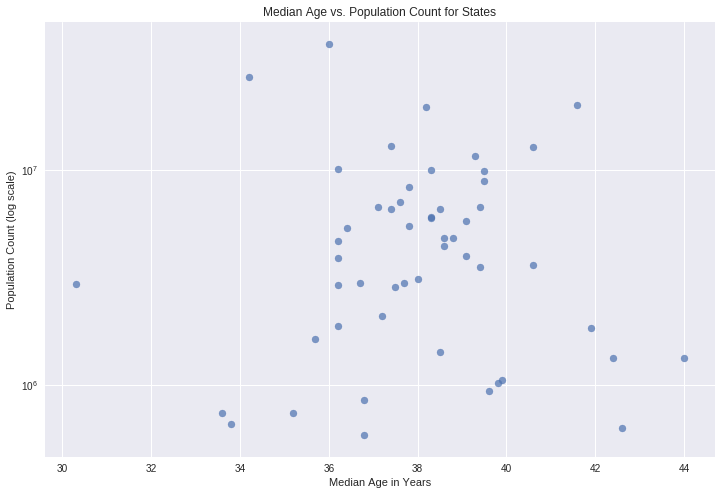

In [0]:
def plot_data(title, pd_table):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel('Median Age in Years')
    plt.ylabel('Population Count (log scale)')
    
    # Scatter plot the information
    ax = plt.gca()
    ax.set_yscale('log')
    ax.scatter(pd_table['median_age'], pd_table['pop_count'], alpha=0.7)

plot_data('Median Age vs. Population Count for States', states_clean)

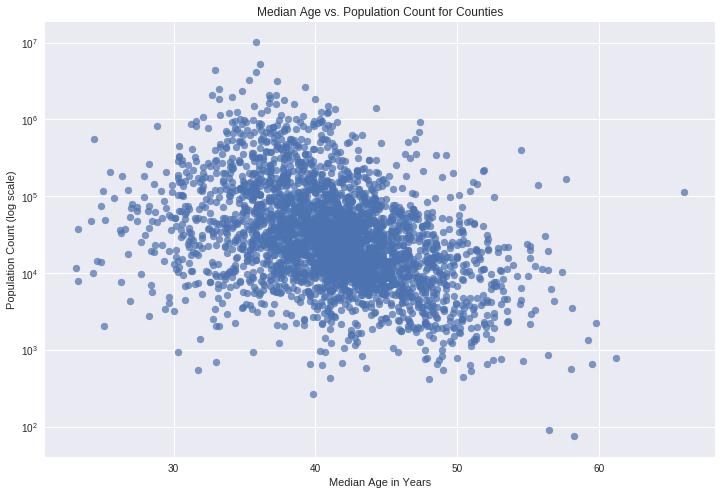

In [0]:
plot_data('Median Age vs. Population Count for Counties', counties_clean)

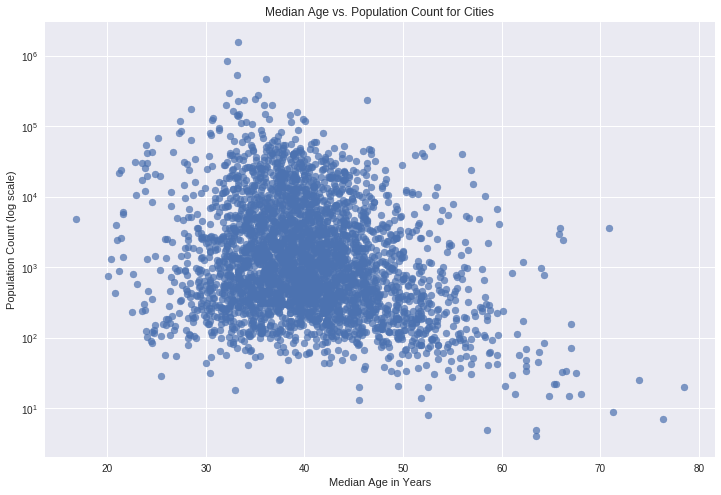

In [0]:
plot_data('Median Age vs. Population Count for Cities', cities_clean)

We can also plot each administrative area granularity on the same plot to see how they relate.

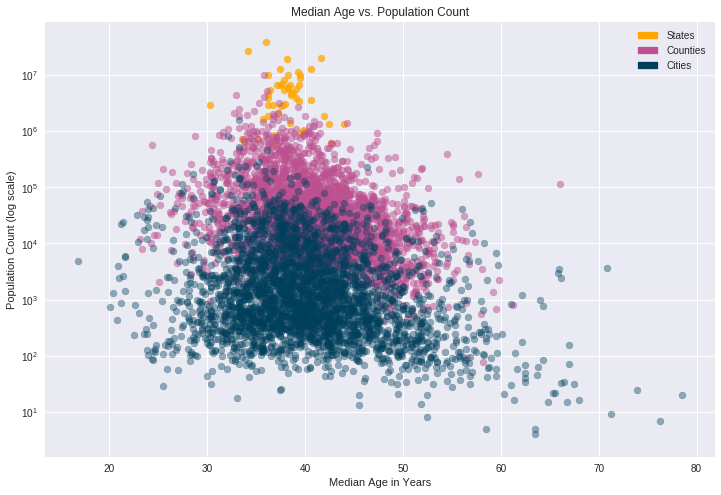

In [0]:
def plot_all_data(state_table, county_table, city_table):
    plt.figure(figsize=(12, 8))
    plt.title('Median Age vs. Population Count')
    plt.xlabel('Median Age in Years')
    plt.ylabel('Population Count (log scale)')
    
    # Make things pretty
    state_color = "#ffa600"
    county_color = "#bc5090"
    city_color = "#003f5c"
    
    # Scatter plot the information
    ax = plt.gca()
    ax.set_yscale('log')
    ax.scatter(state_table['median_age'], state_table['pop_count'], color=state_color, alpha=0.75)
    ax.scatter(county_table['median_age'], county_table['pop_count'], color=county_color, alpha=0.5)
    ax.scatter(city_table['median_age'], city_table['pop_count'], color=city_color, alpha=0.4)
    
    # Create the legend
    state_patch = mpatches.Patch(color=state_color, label='States')
    county_patch = mpatches.Patch(color=county_color, label='Counties')
    city_patch = mpatches.Patch(color=city_color, label='Cities')
    plt.legend(handles=[state_patch, county_patch, city_patch])

plot_all_data(states_clean, counties_clean, cities_clean)

## What's Next

Congratulations - you've completed your first dataCommons task! Now that you have completed the tutorial, you can explore the other dataCommons notebooks to get ideas for querying and joining data from the graph.